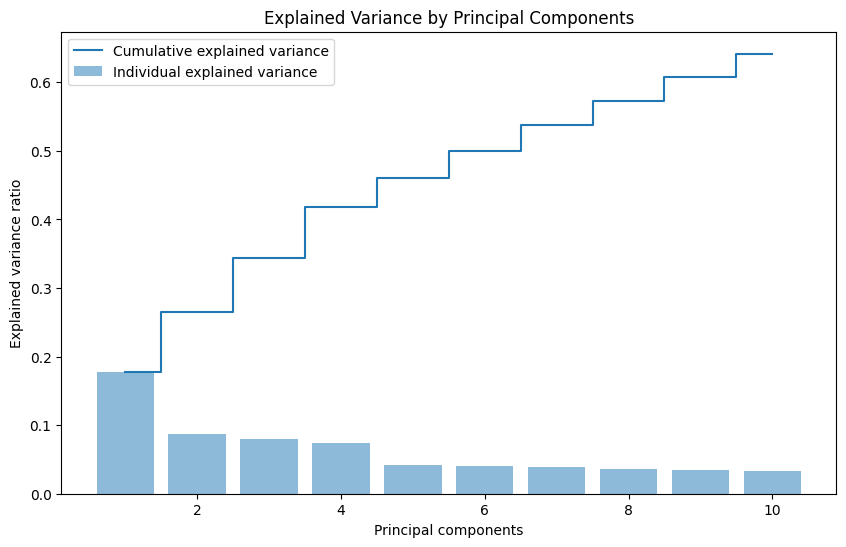

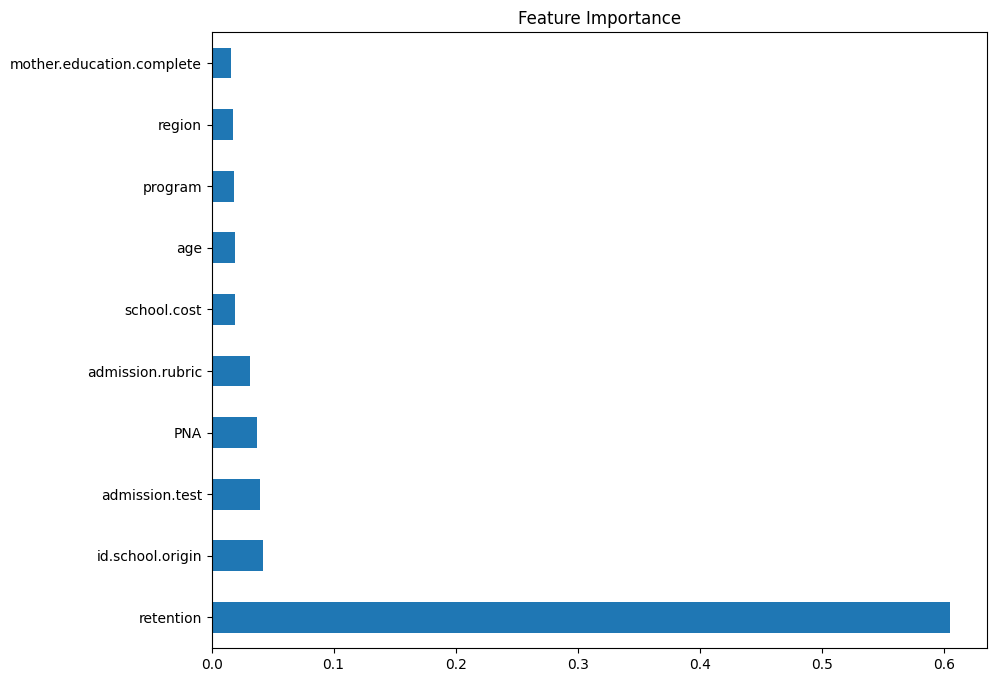

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar los datos procesados
processed_data_path = './data/label_encoded_scaled_data.csv'
processed_data = pd.read_csv(processed_data_path)

# Verificar la naturaleza de la variable objetivo
target_column = 'dropout.semester'  # Reemplaza 'target' con el nombre real de tu columna objetivo
y = processed_data[target_column]

# Determinar si el objetivo es continuo o discreto
if y.dtype == 'object' or len(y.unique()) < 20:  # Ajustar el umbral según sea necesario
    # Clasificación
    y = LabelEncoder().fit_transform(y)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
else:
    # Regresión
    y = y.astype(float)
    model = RandomForestRegressor(n_estimators=100, random_state=42)

# Separar las características
X = processed_data.drop(target_column, axis=1)

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=10)  # Ajusta el número de componentes según tus necesidades
X_pca = pca.fit_transform(X_scaled)

# Visualización de la varianza explicada por cada componente principal
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, 11), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative explained variance')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.title('Explained Variance by Principal Components')
plt.show()

# Feature Importance usando RandomForest
model.fit(X, y)
importances = model.feature_importances_
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names)

# Visualización de la importancia de características
plt.figure(figsize=(10, 8))
forest_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.show()


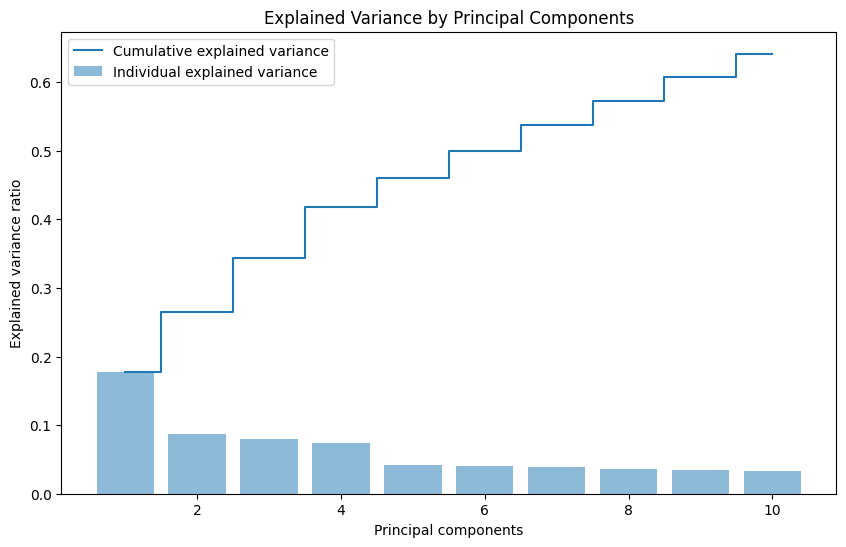

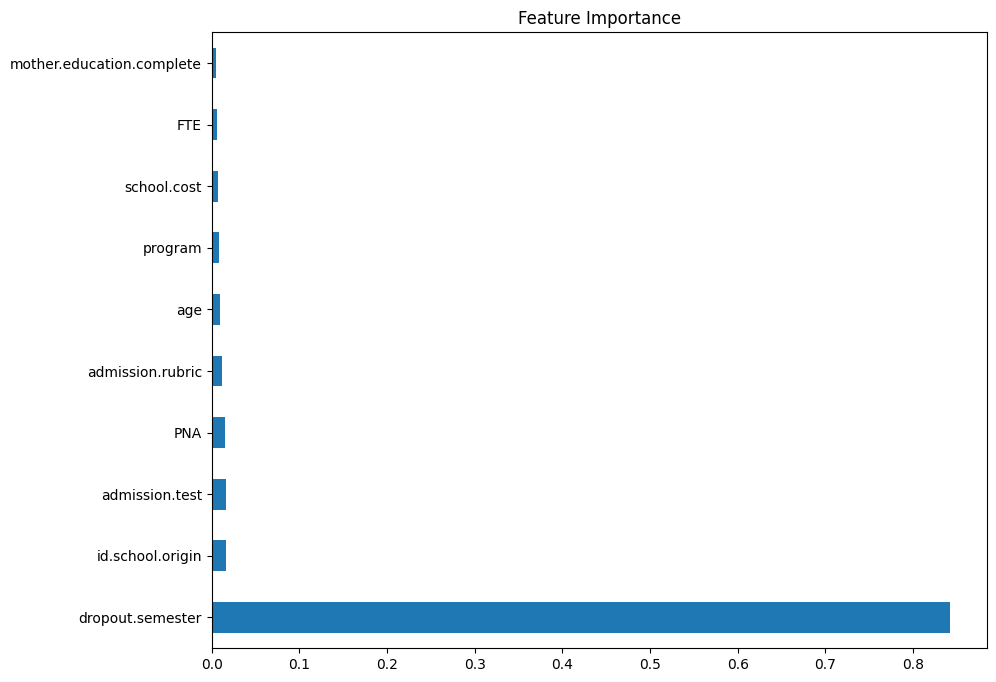

In [13]:
# Verificar la naturaleza de la variable objetivo
target_column = 'retention'  # Reemplaza 'target' con el nombre real de tu columna objetivo
y = processed_data[target_column]

# Determinar si el objetivo es continuo o discreto
if y.dtype == 'object' or len(y.unique()) < 20:  # Ajustar el umbral según sea necesario
    # Clasificación
    y = LabelEncoder().fit_transform(y)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
else:
    # Regresión
    y = y.astype(float)
    model = RandomForestRegressor(n_estimators=100, random_state=42)

# Separar las características
X = processed_data.drop(target_column, axis=1)

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=10)  # Ajusta el número de componentes según tus necesidades
X_pca = pca.fit_transform(X_scaled)

# Visualización de la varianza explicada por cada componente principal
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, 11), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative explained variance')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.title('Explained Variance by Principal Components')
plt.show()

# Feature Importance usando RandomForest
model.fit(X, y)
importances = model.feature_importances_
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names)

# Visualización de la importancia de características
plt.figure(figsize=(10, 8))
forest_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.show()


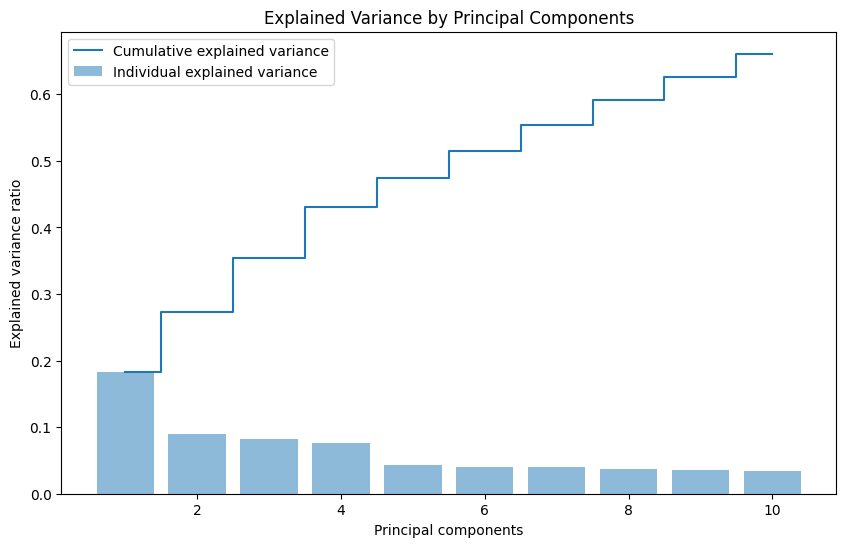

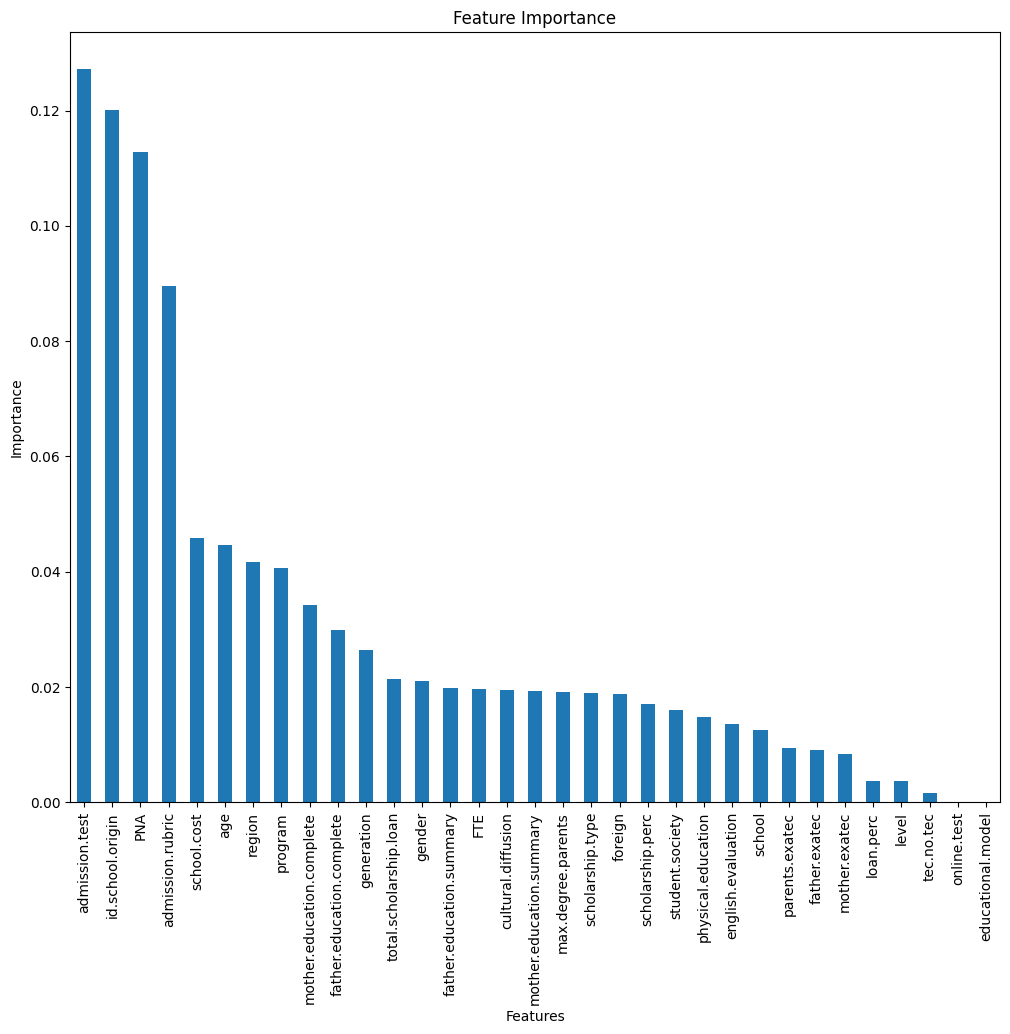

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos procesados
processed_data_path = './data/label_encoded_scaled_data.csv'
processed_data = pd.read_csv(processed_data_path)

#remover columnas no necesarias
processed_data = processed_data.drop(['dropout.semester'], axis=1)

# Verificar la naturaleza de la variable objetivo
target_column = 'retention'  # La variable objetivo es 'retention'
y = processed_data[target_column]

# Si 'retention' no es categórica, la convertimos
if y.dtype != 'object' and len(y.unique()) > 20:
    y = (y > y.median()).astype(int)  # Convertir a binario basado en la mediana

# Usar LabelEncoder si 'retention' es categórica
y = LabelEncoder().fit_transform(y)

# Separar las características
X = processed_data.drop(target_column, axis=1)

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=10)  # Ajusta el número de componentes según tus necesidades
X_pca = pca.fit_transform(X_scaled)

# Visualización de la varianza explicada por cada componente principal
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, 11), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative explained variance')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.title('Explained Variance by Principal Components')
plt.show()

# Feature Importance usando RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
importances = model.feature_importances_
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names)

# Visualización de la importancia de características para todas las características
plt.figure(figsize=(12, 10))
forest_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()


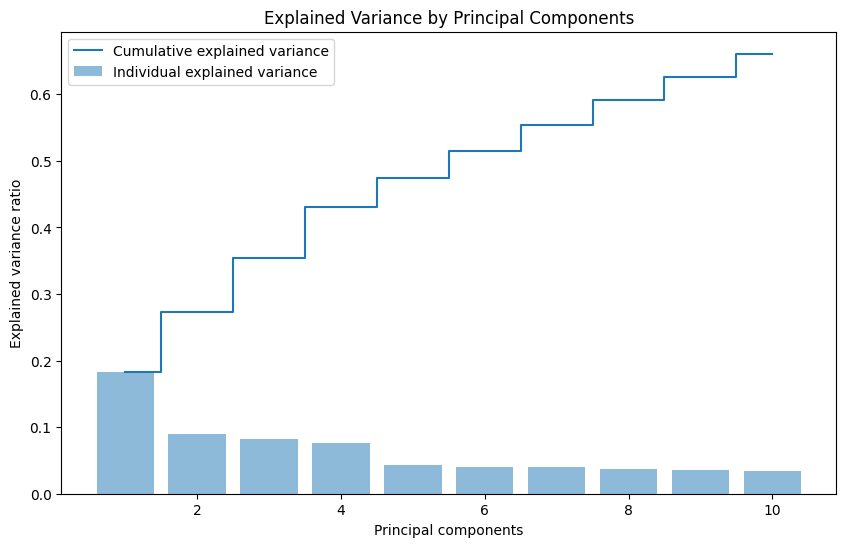

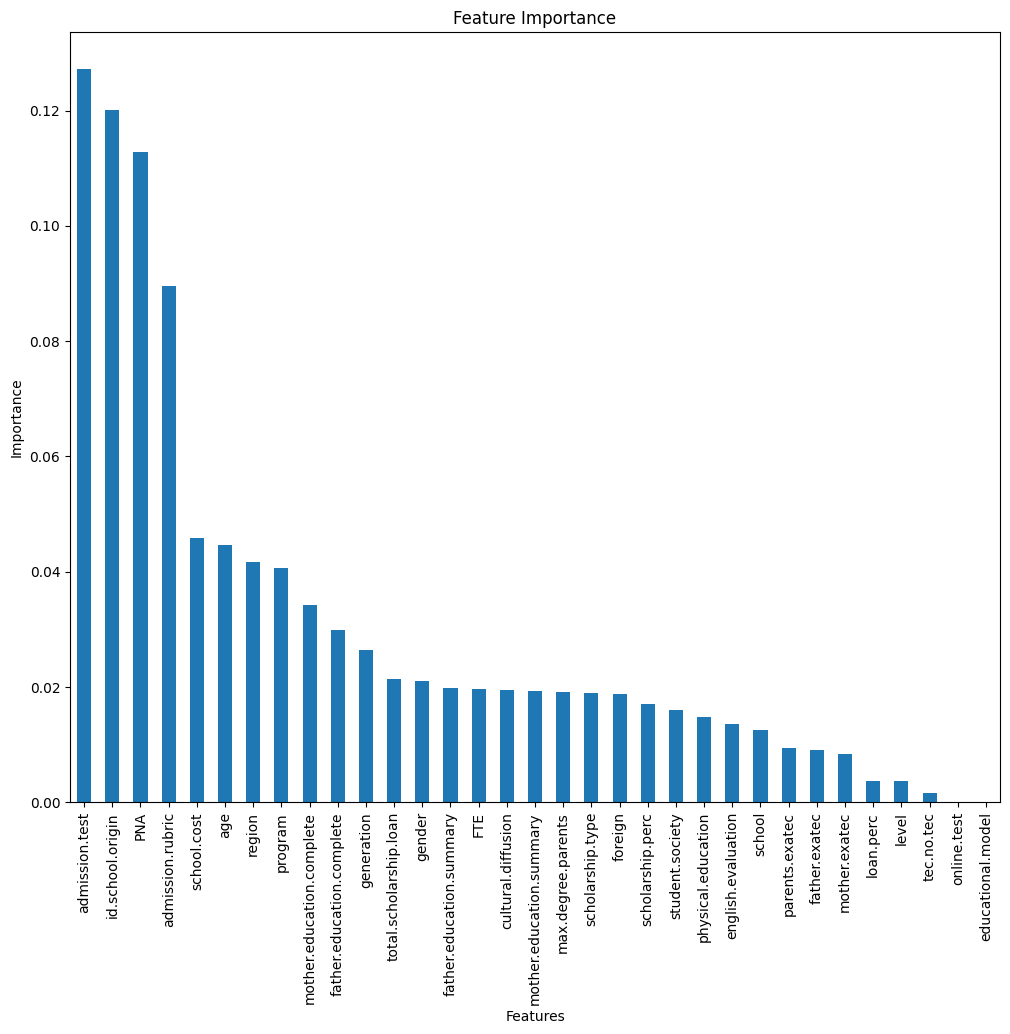

Confusion Matrix:
 [[   0  344]
 [   2 6950]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       344
           1       0.95      1.00      0.98      6952

    accuracy                           0.95      7296
   macro avg       0.48      0.50      0.49      7296
weighted avg       0.91      0.95      0.93      7296


Accuracy Score: 0.9525767543859649


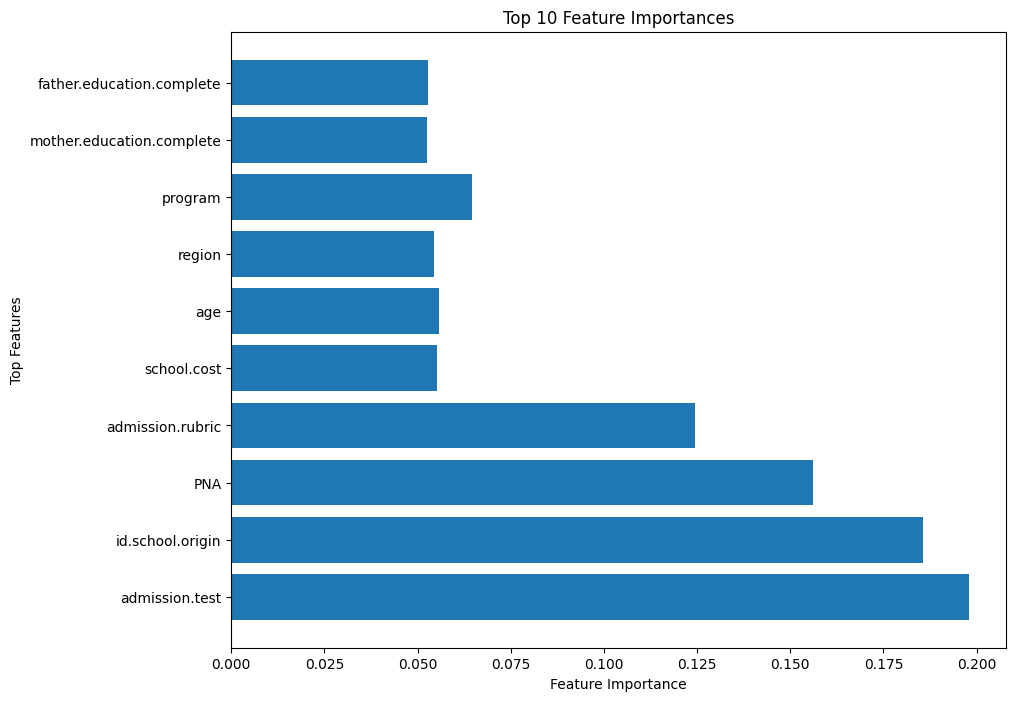

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos procesados
processed_data_path = './data/label_encoded_scaled_data.csv'
processed_data = pd.read_csv(processed_data_path)

# Remover columnas no necesarias
processed_data = processed_data.drop(['dropout.semester'], axis=1)

# Verificar la naturaleza de la variable objetivo
target_column = 'retention'  # La variable objetivo es 'retention'
y = processed_data[target_column]

# Si 'retention' no es categórica, la convertimos
if y.dtype != 'object' and len(y.unique()) > 20:
    y = (y > y.median()).astype(int)  # Convertir a binario basado en la mediana

# Usar LabelEncoder si 'retention' es categórica
y = LabelEncoder().fit_transform(y)

# Separar las características
X = processed_data.drop(target_column, axis=1)

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=10)  # Ajusta el número de componentes según tus necesidades
X_pca = pca.fit_transform(X_scaled)

# Visualización de la varianza explicada por cada componente principal
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, 11), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative explained variance')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.title('Explained Variance by Principal Components')
plt.show()

# Feature Importance usando RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
importances = model.feature_importances_
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names)

# Visualización de la importancia de características para todas las características
plt.figure(figsize=(12, 10))
forest_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

# Separar las características más importantes (por ejemplo, las top 10)
top_features = forest_importances.nlargest(10).index
X_top = X[top_features]

# División del dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.3, random_state=42)

# Entrenamiento del modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Visualización de la importancia de las características
importances = model.feature_importances_
plt.figure(figsize=(10, 8))
plt.barh(top_features, importances, align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Top Features')
plt.title('Top 10 Feature Importances')
plt.show()


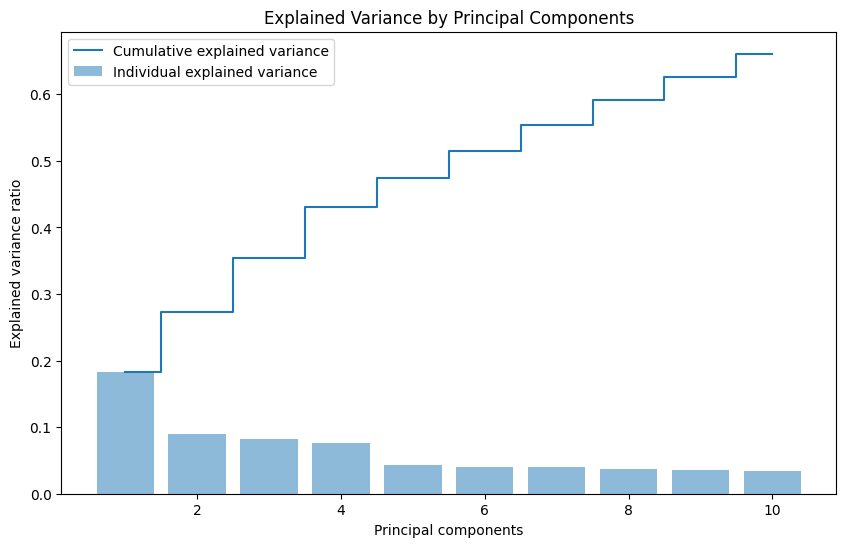

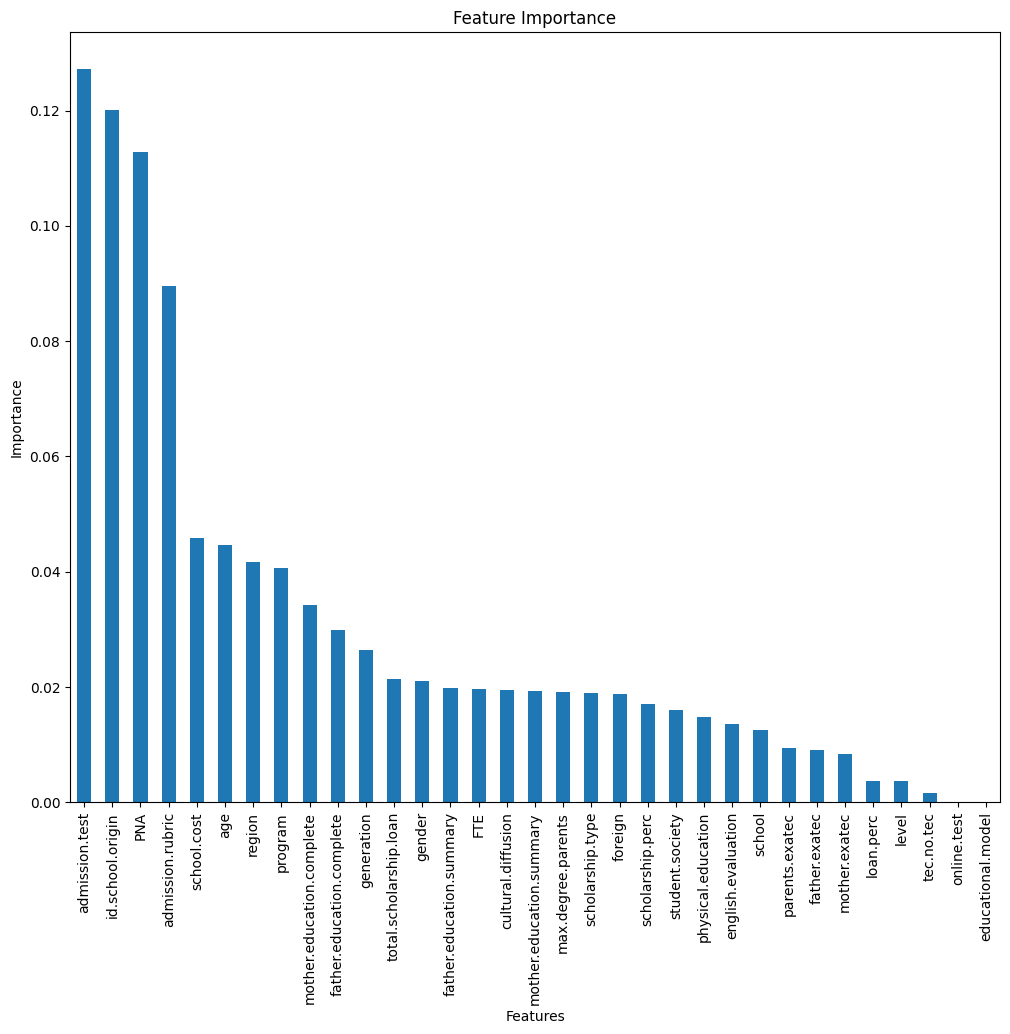

Confusion Matrix:
 [[   0  346]
 [   0 6950]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       346
           1       0.95      1.00      0.98      6950

    accuracy                           0.95      7296
   macro avg       0.48      0.50      0.49      7296
weighted avg       0.91      0.95      0.93      7296


Accuracy Score: 0.9525767543859649


C:\Users\rogel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rogel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rogel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

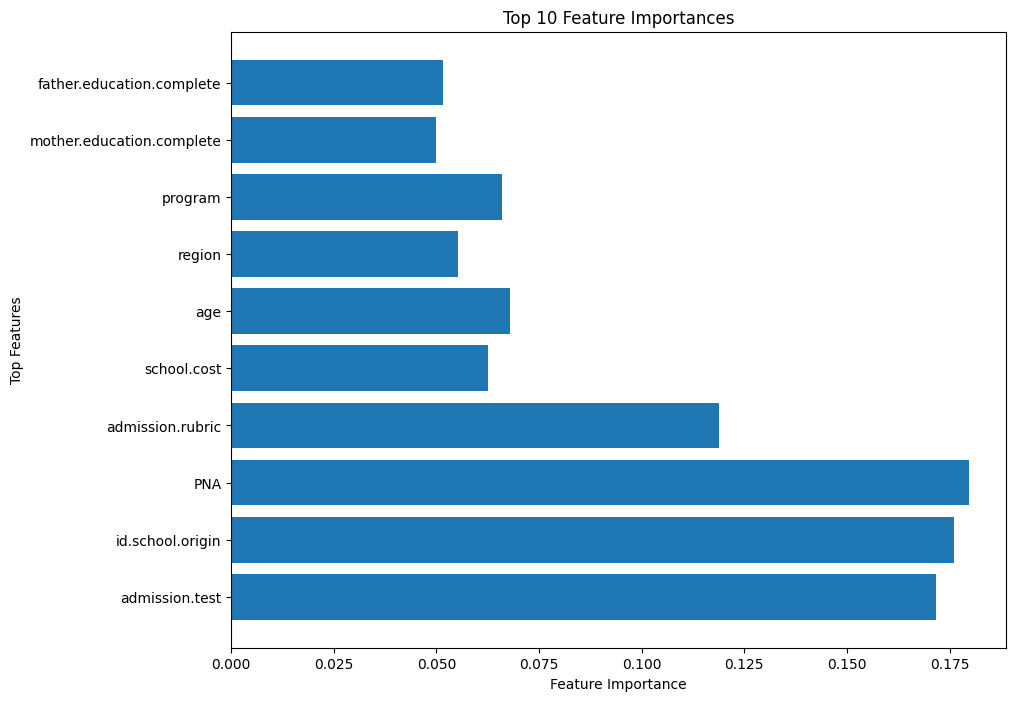

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos procesados
processed_data_path = './data/label_encoded_scaled_data.csv'
processed_data = pd.read_csv(processed_data_path)

# Remover columnas no necesarias
processed_data = processed_data.drop(['dropout.semester'], axis=1)

# Verificar la naturaleza de la variable objetivo
target_column = 'retention'  # La variable objetivo es 'retention'
y = processed_data[target_column]

# Si 'retention' no es categórica, la convertimos
if y.dtype != 'object' and len(y.unique()) > 20:
    y = (y > y.median()).astype(int)  # Convertir a binario basado en la mediana

# Usar LabelEncoder si 'retention' es categórica
y = LabelEncoder().fit_transform(y)

# Separar las características
X = processed_data.drop(target_column, axis=1)

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=10)  # Ajusta el número de componentes según tus necesidades
X_pca = pca.fit_transform(X_scaled)

# Visualización de la varianza explicada por cada componente principal
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, 11), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative explained variance')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.title('Explained Variance by Principal Components')
plt.show()

# Feature Importance usando RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
importances = model.feature_importances_
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names)

# Visualización de la importancia de características para todas las características
plt.figure(figsize=(12, 10))
forest_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

# Separar las características más importantes (por ejemplo, las top 10)
top_features = forest_importances.nlargest(10).index
X_top = X[top_features]

# División del dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.3, random_state=42, stratify=y)

# Ajustar el modelo para manejar el desbalance de clases
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Visualización de la importancia de las características
importances = model.feature_importances_
plt.figure(figsize=(10, 8))
plt.barh(top_features, importances, align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Top Features')
plt.title('Top 10 Feature Importances')
plt.show()


In [22]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE para sobremuestreo
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Entrenamiento del modelo con datos sobremuestreados
model.fit(X_res, y_res)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[  27  319]
 [ 201 6749]]

Classification Report:
               precision    recall  f1-score   support

           0       0.12      0.08      0.09       346
           1       0.95      0.97      0.96      6950

    accuracy                           0.93      7296
   macro avg       0.54      0.52      0.53      7296
weighted avg       0.92      0.93      0.92      7296


Accuracy Score: 0.9287280701754386


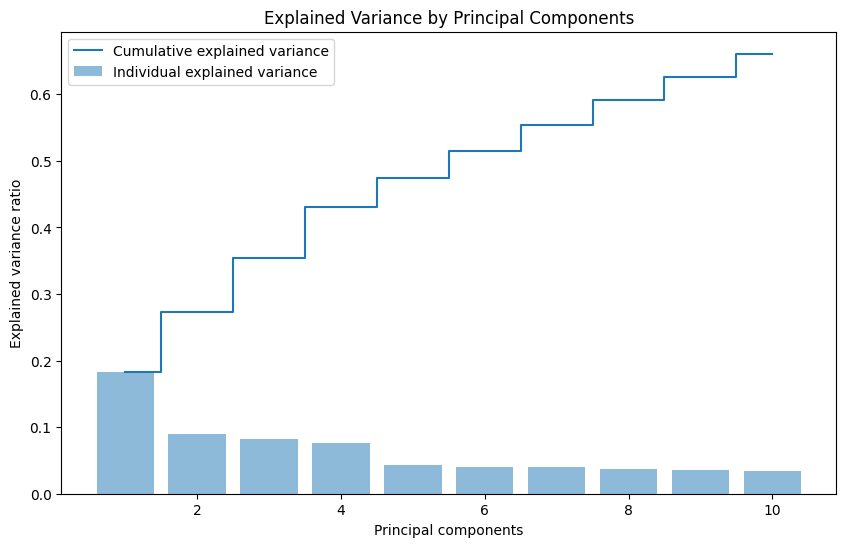

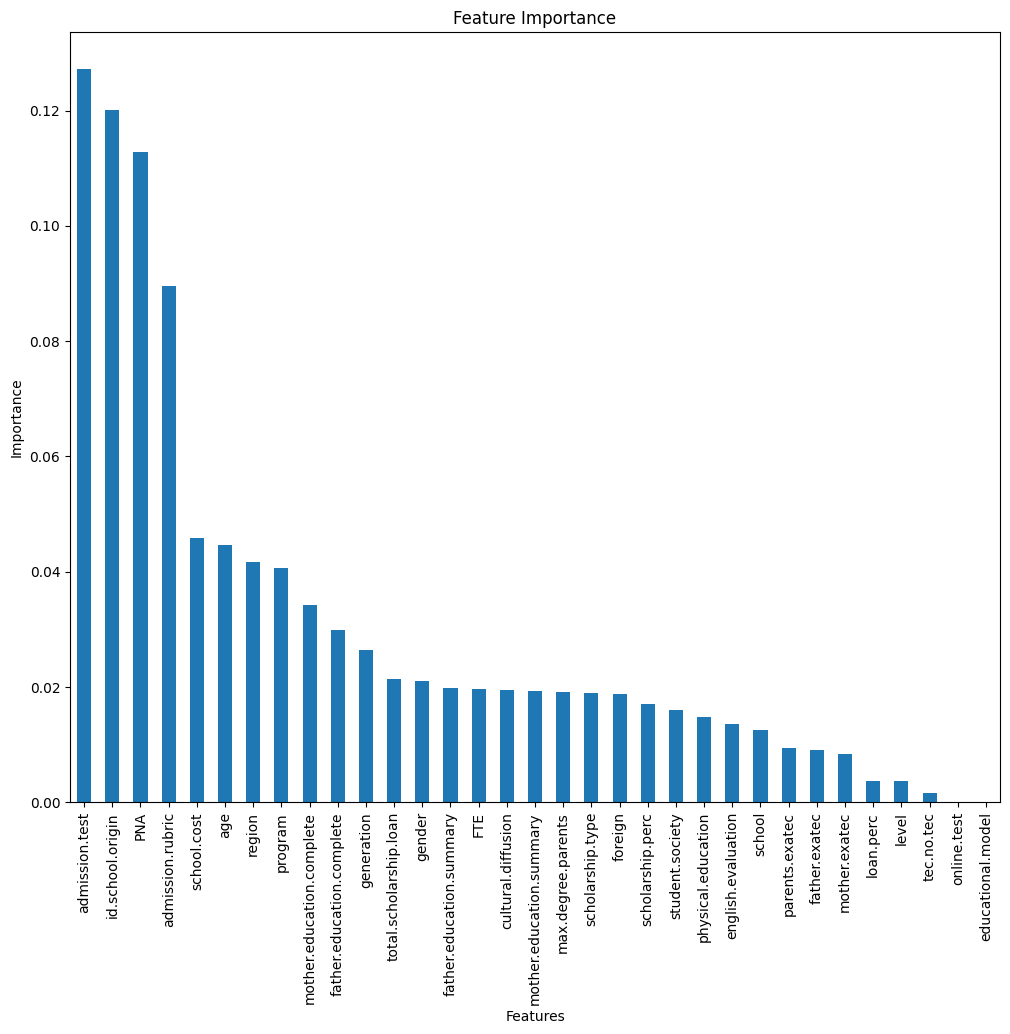

Confusion Matrix:
 [[  27  319]
 [ 201 6749]]

Classification Report:
               precision    recall  f1-score   support

           0       0.12      0.08      0.09       346
           1       0.95      0.97      0.96      6950

    accuracy                           0.93      7296
   macro avg       0.54      0.52      0.53      7296
weighted avg       0.92      0.93      0.92      7296


Accuracy Score: 0.9287280701754386


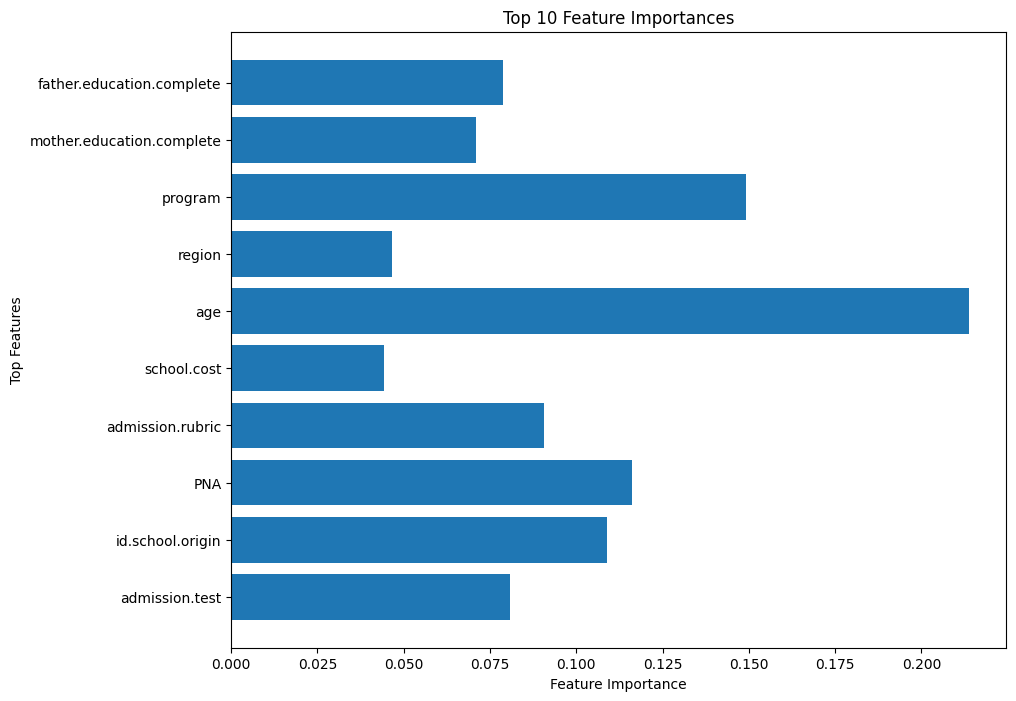

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos procesados
processed_data_path = './data/label_encoded_scaled_data.csv'
processed_data = pd.read_csv(processed_data_path)

# Remover columnas no necesarias
processed_data = processed_data.drop(['dropout.semester'], axis=1)

# Verificar la naturaleza de la variable objetivo
target_column = 'retention'  # La variable objetivo es 'retention'
y = processed_data[target_column]

# Si 'retention' no es categórica, la convertimos
if y.dtype != 'object' and len(y.unique()) > 20:
    y = (y > y.median()).astype(int)  # Convertir a binario basado en la mediana

# Usar LabelEncoder si 'retention' es categórica
y = LabelEncoder().fit_transform(y)

# Separar las características
X = processed_data.drop(target_column, axis=1)

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=10)  # Ajusta el número de componentes según tus necesidades
X_pca = pca.fit_transform(X_scaled)

# Visualización de la varianza explicada por cada componente principal
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, 11), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative explained variance')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.title('Explained Variance by Principal Components')
plt.show()

# Feature Importance usando RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
importances = model.feature_importances_
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names)

# Visualización de la importancia de características para todas las características
plt.figure(figsize=(12, 10))
forest_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

# Separar las características más importantes (por ejemplo, las top 10)
top_features = forest_importances.nlargest(10).index
X_top = X[top_features]

# División del dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.3, random_state=42, stratify=y)

# Aplicar SMOTE para sobremuestreo
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Ajustar el modelo para manejar el desbalance de clases
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_res, y_res)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Visualización de la importancia de las características
importances = model.feature_importances_
plt.figure(figsize=(10, 8))
plt.barh(top_features, importances, align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Top Features')
plt.title('Top 10 Feature Importances')
plt.show()


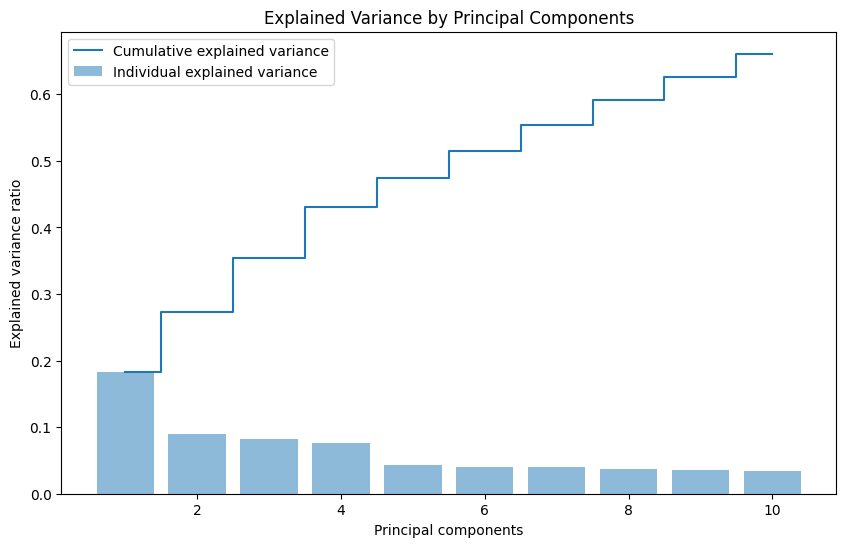

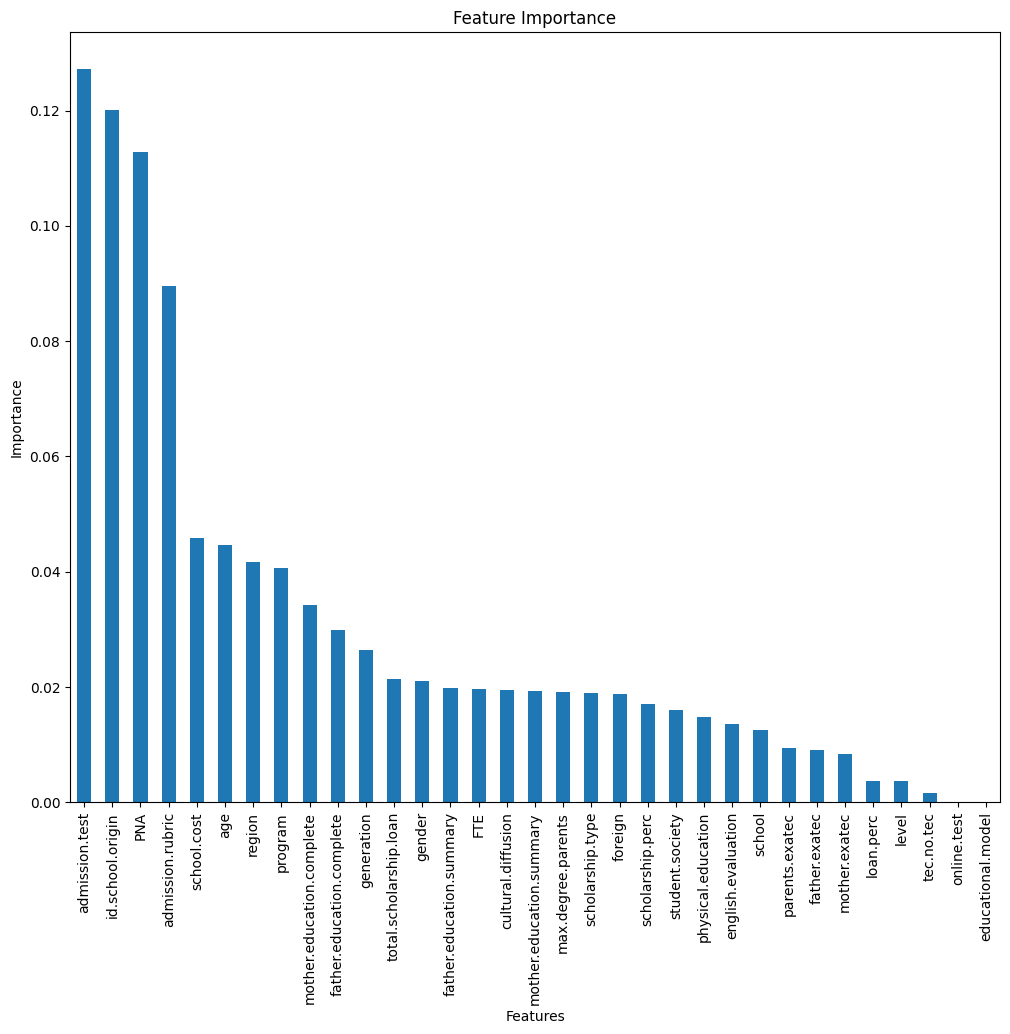

Fitting 5 folds for each of 90 candidates, totalling 450 fits


C:\Users\rogel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
98 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rogel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rogel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pa

Random Forest Confusion Matrix:
 [[  93  253]
 [ 917 6033]]

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.09      0.27      0.14       346
           1       0.96      0.87      0.91      6950

    accuracy                           0.84      7296
   macro avg       0.53      0.57      0.52      7296
weighted avg       0.92      0.84      0.87      7296


Random Forest Accuracy Score: 0.8396381578947368
Gradient Boosting Confusion Matrix:
 [[  59  287]
 [ 506 6444]]

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.10      0.17      0.13       346
           1       0.96      0.93      0.94      6950

    accuracy                           0.89      7296
   macro avg       0.53      0.55      0.54      7296
weighted avg       0.92      0.89      0.90      7296


Gradient Boosting Accuracy Score: 0.8913103070175439


In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos procesados
processed_data_path = './data/label_encoded_scaled_data.csv'
processed_data = pd.read_csv(processed_data_path)

# Remover columnas no necesarias
processed_data = processed_data.drop(['dropout.semester'], axis=1)

# Verificar la naturaleza de la variable objetivo
target_column = 'retention'  # La variable objetivo es 'retention'
y = processed_data[target_column]

# Si 'retention' no es categórica, la convertimos
if y.dtype != 'object' and len(y.unique()) > 20:
    y = (y > y.median()).astype(int)  # Convertir a binario basado en la mediana

# Usar LabelEncoder si 'retention' es categórica
y = LabelEncoder().fit_transform(y)

# Separar las características
X = processed_data.drop(target_column, axis=1)

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=10)  # Ajusta el número de componentes según tus necesidades
X_pca = pca.fit_transform(X_scaled)

# Visualización de la varianza explicada por cada componente principal
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, 11), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative explained variance')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.title('Explained Variance by Principal Components')
plt.show()

# Feature Importance usando RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
importances = model.feature_importances_
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names)

# Visualización de la importancia de características para todas las características
plt.figure(figsize=(12, 10))
forest_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

# Separar las características más importantes (por ejemplo, las top 10)
top_features = forest_importances.nlargest(10).index
X_top = X[top_features]

# División del dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.3, random_state=42, stratify=y)

# Aplicar SMOTE para sobremuestreo
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Ajustar el modelo para manejar el desbalance de clases usando GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_res, y_res)

# Mejor modelo
best_rf_model = grid_search.best_estimator_

# Predicciones con el mejor modelo
y_pred_rf = best_rf_model.predict(X_test)

# Evaluación del mejor modelo
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("\nRandom Forest Accuracy Score:", accuracy_score(y_test, y_pred_rf))

# Probar GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_res, y_res)

# Predicciones con GradientBoostingClassifier
y_pred_gb = gb_model.predict(X_test)

# Evaluación del modelo GradientBoostingClassifier
print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("\nGradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))
print("\nGradient Boosting Accuracy Score:", accuracy_score(y_test, y_pred_gb))
